# Here we are using ta-lib for technical indicartor usage is a widely used library for calculating over 200 technical indicators 

#  pip install TA-LIB


In [1]:
# First of all download data from yahoo there are lots of way to download this type data if u want to know give me a message i will provide 
# various type of ways to scrap the data 

https://blog.quantinsti.com/build-technical-indicators-in-python/

In [2]:
# Refer above website for more clarity 

In [4]:
# Lety start with moving averages 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
from datetime import datetime 

In [9]:
symbol=["RELIANCE.NS"]
start_date='1995-11-29'
end_date=datetime.now()


In [10]:
reliance=yf.download(symbol , start_date , end_date, multi_level_index=False)

C:\Users\za220\AppData\Local\Temp\ipykernel_10020\2197214790.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  reliance=yf.download(symbol , start_date , end_date, multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


In [11]:
reliance

,Close,High,Low,Open,Volume
Date,,,,,
1996-01-01,4.617049,4.624903,4.569925,4.600219,104121369
1996-01-02,4.581144,4.628269,4.547485,4.605829,168743308
1996-01-03,4.615926,4.868377,4.605828,4.656318,209323879
1996-01-04,4.573291,4.586755,4.511581,4.572169,216900264
1996-01-05,4.541874,4.555339,4.502604,4.555339,166708467
...,...,...,...,...,...
2025-09-23,1389.800049,1395.000000,1376.800049,1391.000000,14014702
2025-09-24,1383.000000,1396.000000,1380.400024,1385.300049,5922759
2025-09-25,1372.400024,1384.500000,1369.000000,1381.300049,11411143


In [12]:
#Simple moving averages 



In [35]:
def SimpleMovingAverages(data , ndays):
    sma=pd.Series(data['Close'].rolling(ndays).mean() , name="SMA")
    data=data.join(sma)
    return data

In [36]:
# OTher type of moving average is Exponentially weighted moving average

In [41]:
def ExponentialMovingAverages(data , ndays):
    ema=pd.Series(data['Close'].ewm(span=ndays , min_periods=ndays-1).mean(), name='EWM_' + str(ndays))
    data=data.join(ema)
    return data 

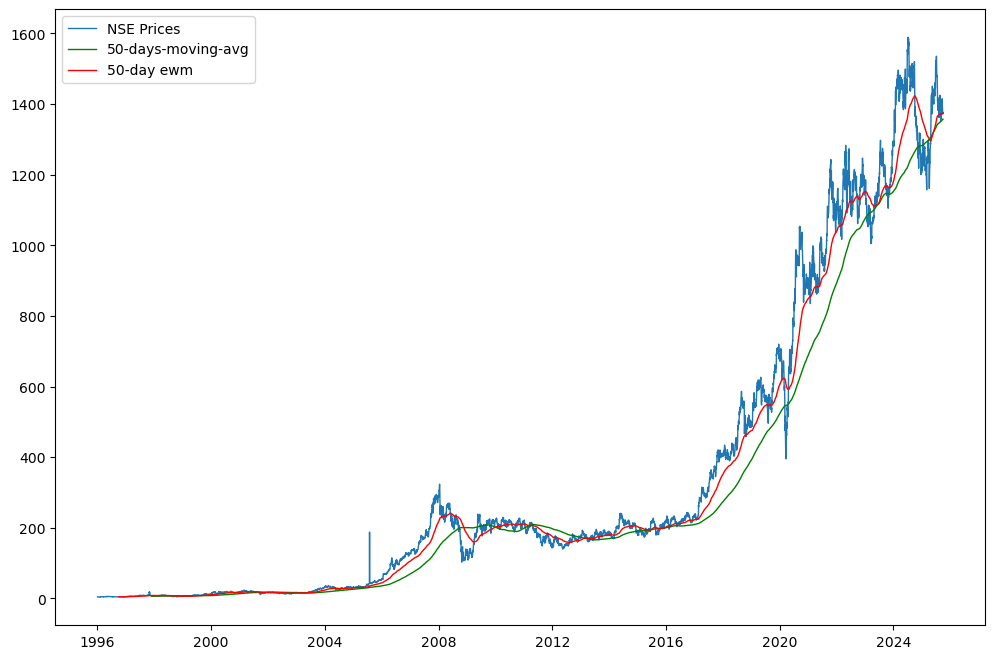

In [52]:
#Compute the 500 days moving averages
n=500
sma=SimpleMovingAverages(reliance , n)
# print(sma)
sma=sma.dropna(subset=['SMA']) # this means it will give u all rows whose value is not NA
sma_series=sma['SMA']
n2=200
ewm=ExponentialMovingAverages(reliance, n2)
ewm=ewm.dropna(subset=['EWM_200'])
ewm_serIes=ewm['EWM_200']


plt.figure(figsize=(12 ,8))
plt.plot(reliance['Close'], lw=1 , label='NSE Prices')
plt.plot(sma_series, lw=1, label='50-days-moving-avg', color='green')
plt.plot(ewm_serIes , lw=1 , label='50-day ewm ' ,color='red')

plt.legend()
plt.show()
